In [4]:
import os

path = 'D:\\MEGA\\VTCA\\AI_Specialist\\VTCA AI Specialist (HN)\\3. Dataset\\AI Specialist Support 01'

os.chdir(path)

In [5]:
%pwd

'D:\\MEGA\\VTCA\\AI_Specialist\\VTCA AI Specialist (HN)\\3. Dataset\\AI Specialist Support 01'

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from IPython.display import display, Image

In [7]:
import warnings
warnings.filterwarnings("ignore")

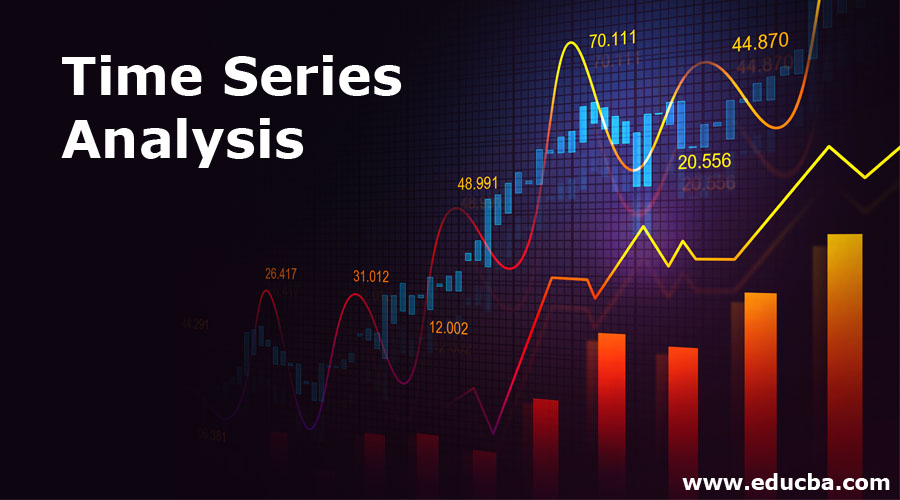

In [8]:
display(Image(filename='Time-Series-Analysis.jpg'))

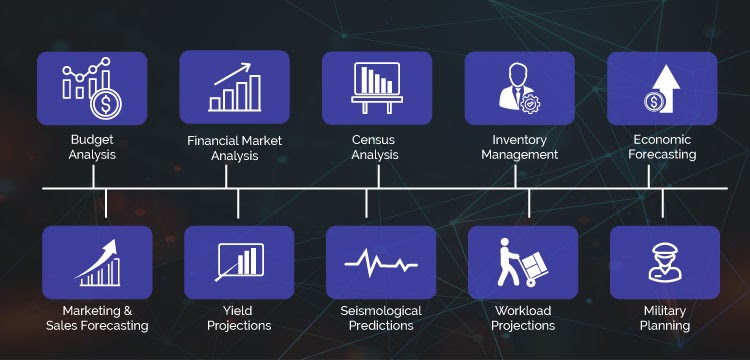

In [9]:
display(Image(filename='Time Series Applications.jpg'))

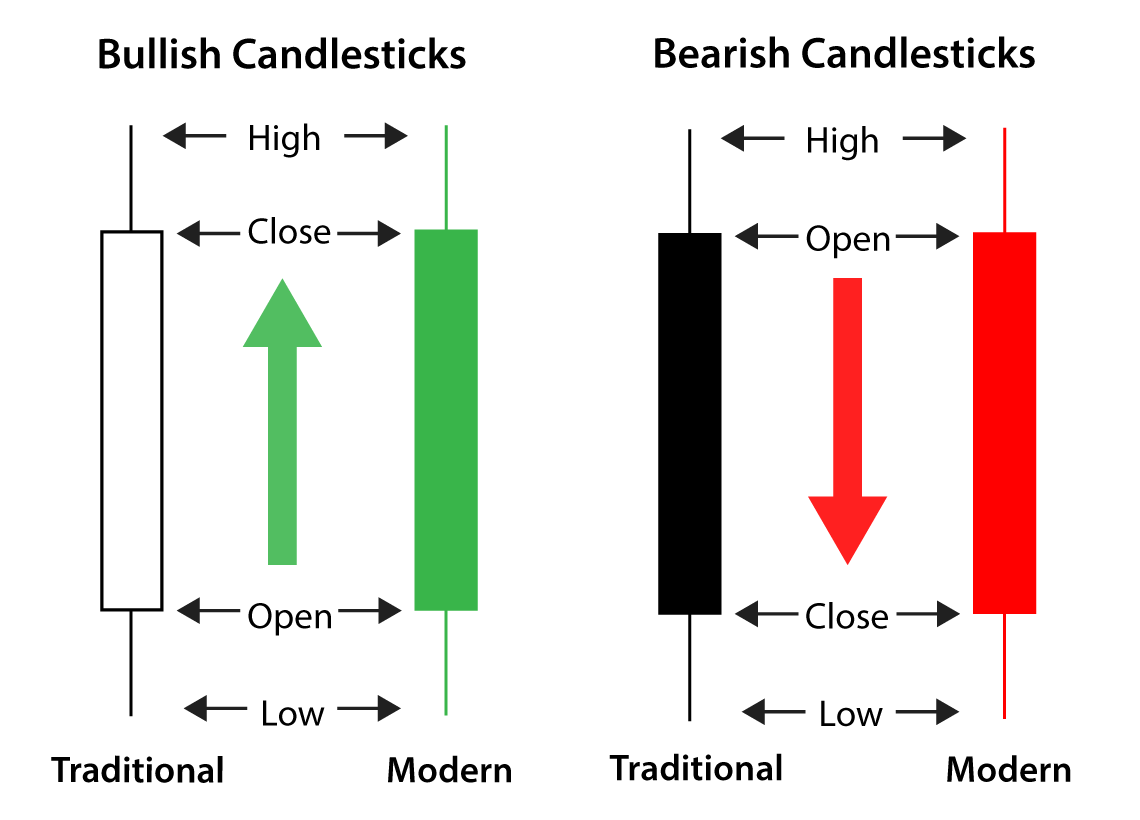

In [10]:
display(Image(filename='Candlesticks.png'))

In [11]:
# Understanding the Problem Statement
# Moving Average
# Linear Regression
# k-Nearest Neighbors
# Auto ARIMA
# Long Short Term Memory (LSTM)

In [12]:
data = pd.read_csv('NSE-TATAGLOBAL11.csv')
display(data.head())
print(data.shape)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


(1235, 8)


**High**: gia cao nhat trong ngay

**Low**: gia thap nhat trong ngay

**Open**: gia mo cua

**Close**: gia dong cua

**Total Trade Quantity**: tong giao dich trong ngay

**Turnover**: trung binh / sum trong khoang thoi gian

**Last**: sau khi co gia Close, se cap nhat chinh sua de cho ra gia Last

In [13]:
data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity    float64
Turnover (Lacs)         float64
dtype: object

In [14]:
data.index = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data = data.sort_index(ascending=True, axis = 0)
display(data.head())

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


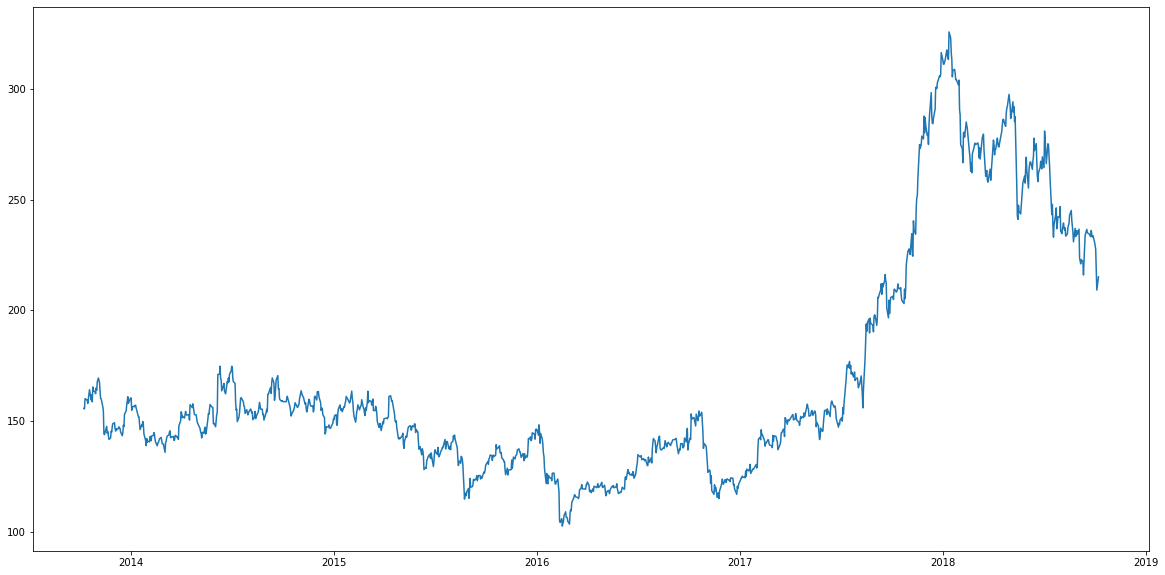

In [15]:
plt.plot(data['Close'])
plt.show()

In [16]:
new_data = data.copy()

In [17]:
from fastai.tabular.all import add_datepart
add_datepart(new_data, "Date")

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Date,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,2018,10,40,1,0,274,False,True,False,True,False,False,1.538352e+09
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2018,10,40,3,2,276,False,False,False,False,False,False,1.538525e+09
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,2018,10,40,4,3,277,False,False,False,False,False,False,1.538611e+09


In [18]:
new_data['mon_fri'] = 0
for i in new_data.index:
    if new_data.loc[i, 'Dayofweek'] == 0 or new_data.loc[i, 'Dayofweek'] == 4:
        new_data.loc[i, 'mon_fri'] = 1
display(new_data.head())

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,2013,10,41,...,1,281,False,False,False,False,False,False,1.381190e+09,0
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,2013,10,41,...,2,282,False,False,False,False,False,False,1.381277e+09,0
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,2013,10,41,...,3,283,False,False,False,False,False,False,1.381363e+09,0
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,2013,10,41,...,4,284,False,False,False,False,False,False,1.381450e+09,1
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,2013,10,42,...,0,287,False,False,False,False,False,False,1.381709e+09,1


In [19]:
# Moving Average
train = new_data[:987]
valid = new_data[987:]

In [20]:
train.shape, valid.shape

((987, 21), (248, 21))

In [21]:
preds = []
for i in range(0, 248):
    prev = train['Close'][len(train) - 248 + i :].sum() + sum(preds)
    preds.append(prev/248)

In [22]:
rms = np.sqrt(np.mean(np.power((np.array(valid["Close"]) - preds),2)))
rms

104.51415465984356

In [23]:
date_index = valid.index # copy date index to temp variable
valid = valid.reset_index(drop=True) # reset index to 0, 1, 2, ...
valid["Predictions"] = preds # add new column predictions
valid.index = date_index # assign index to date time again
valid.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri,Predictions
Date,,,,,,,,,,,,,,,,,,,,,
2017-10-09,209.65,211.35,207.65,208.25,208.30,1653094.0,3454.22,2017,10,41,...,282,False,False,False,False,False,False,1.507507e+09,1,152.306452
2017-10-10,209.50,211.15,207.70,208.50,208.45,2125747.0,4448.80,2017,10,41,...,283,False,False,False,False,False,False,1.507594e+09,0,152.310711
2017-10-11,209.45,216.00,205.60,209.75,209.40,6891689.0,14629.38,2017,10,41,...,284,False,False,False,False,False,False,1.507680e+09,0,152.313376
2017-10-12,211.00,212.90,208.00,212.00,212.00,3902627.0,8224.13,2017,10,41,...,285,False,False,False,False,False,False,1.507766e+09,0,152.331373
2017-10-13,211.00,214.20,209.25,210.00,210.25,3171251.0,6713.26,2017,10,41,...,286,False,False,False,False,False,False,1.507853e+09,1,152.327871


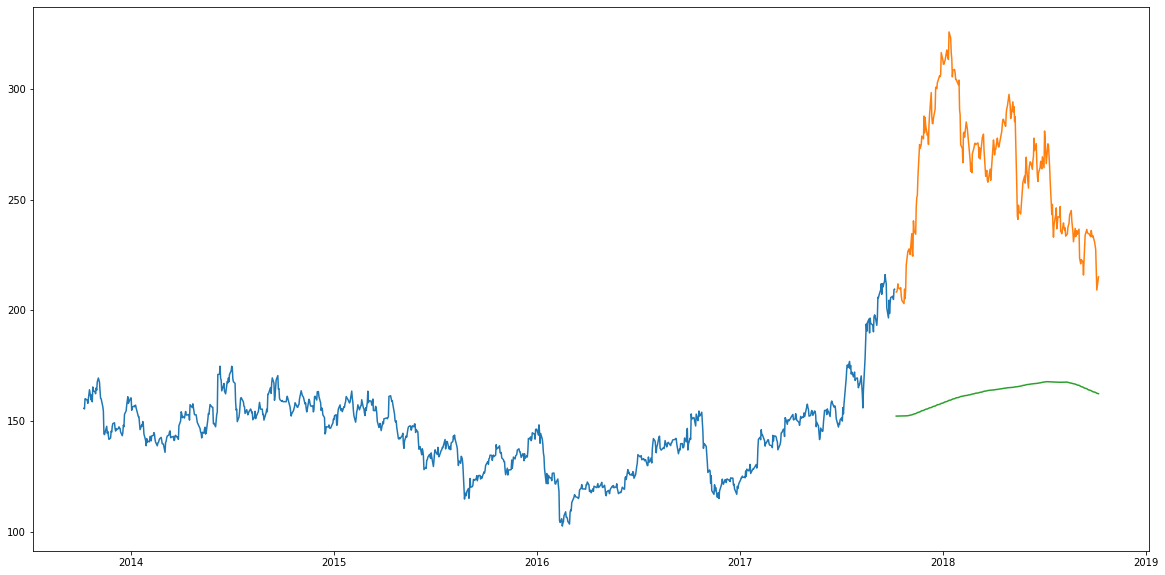

In [24]:
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()

In [25]:
new_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,2013,10,41,...,1,281,False,False,False,False,False,False,1.381190e+09,0
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,2013,10,41,...,2,282,False,False,False,False,False,False,1.381277e+09,0
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,2013,10,41,...,3,283,False,False,False,False,False,False,1.381363e+09,0
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,2013,10,41,...,4,284,False,False,False,False,False,False,1.381450e+09,1
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,2013,10,42,...,0,287,False,False,False,False,False,False,1.381709e+09,1


In [26]:
# Linear Regression

train = new_data[:987]
test = new_data[987:]

train.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,2013,10,41,...,1,281,False,False,False,False,False,False,1.381190e+09,0
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,2013,10,41,...,2,282,False,False,False,False,False,False,1.381277e+09,0
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,2013,10,41,...,3,283,False,False,False,False,False,False,1.381363e+09,0
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,2013,10,41,...,4,284,False,False,False,False,False,False,1.381450e+09,1
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,2013,10,42,...,0,287,False,False,False,False,False,False,1.381709e+09,1


In [27]:
DropCols = ["Open", "High", "Low", "Last", "Total Trade Quantity", "Turnover (Lacs)", "Elapsed"]

train.drop(DropCols, axis=1)
test.drop(DropCols, axis=1)

train.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,2013,10,41,...,1,281,False,False,False,False,False,False,1.381190e+09,0
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,2013,10,41,...,2,282,False,False,False,False,False,False,1.381277e+09,0
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,2013,10,41,...,3,283,False,False,False,False,False,False,1.381363e+09,0
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,2013,10,41,...,4,284,False,False,False,False,False,False,1.381450e+09,1
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,2013,10,42,...,0,287,False,False,False,False,False,False,1.381709e+09,1


In [28]:
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_test = test.drop('Close', axis=1)
y_test = test['Close']

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.values, y_train.values)

LinearRegression()

In [30]:
preds = model.predict(x_test.values)
rms = np.sqrt(np.mean(np.power(np.array(test['Close'] - preds), 2)))
rms

0.6279382533910685

In [31]:
test = test.reset_index(drop = True)
test['Predictions'] = preds

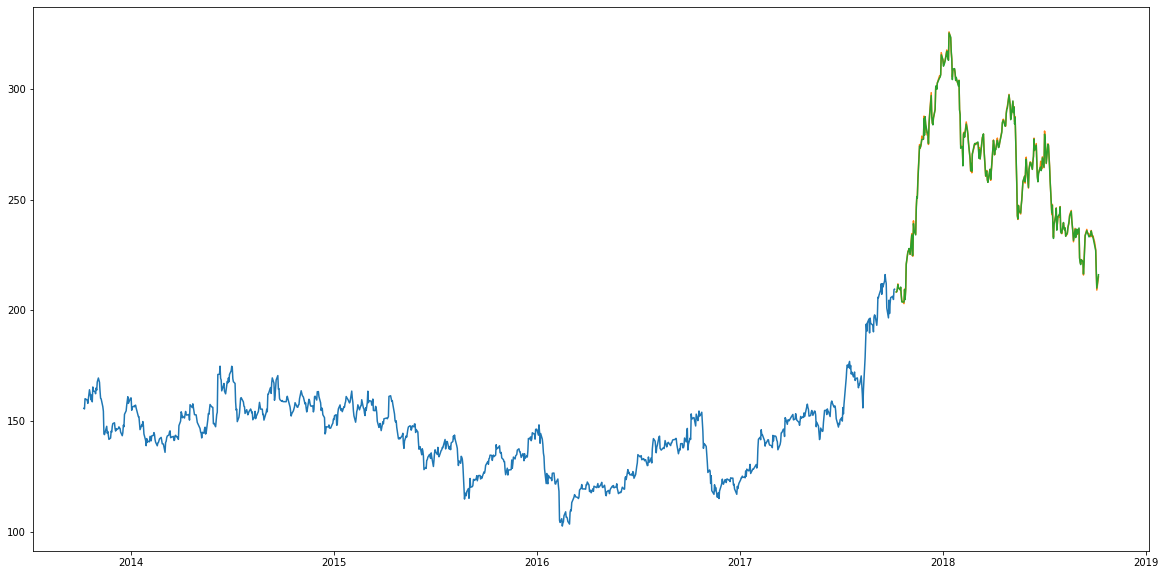

In [32]:
#plot
import matplotlib.pyplot as plt
test.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

In [33]:
# k-Nearest Neighbors
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 15 , 16, 18, 19, 20, 25]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train.values, y_train.values)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                         16, 18, 19, 20, 25]})

In [34]:
model.best_params_

{'n_neighbors': 7}

In [35]:
preds = model.predict(x_test.values)
rms = np.sqrt(np.mean(np.power(np.array(test['Close'] - preds), 2)))
rms

64.140082244933

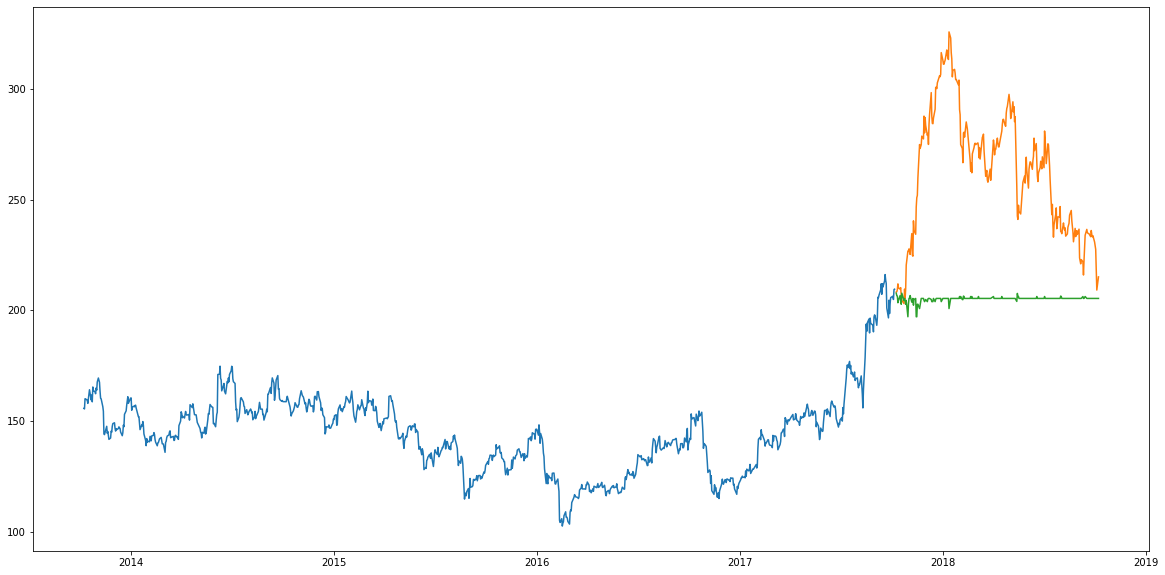

In [36]:
test['Predictions'] = preds
#plot
import matplotlib.pyplot as plt
test.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])

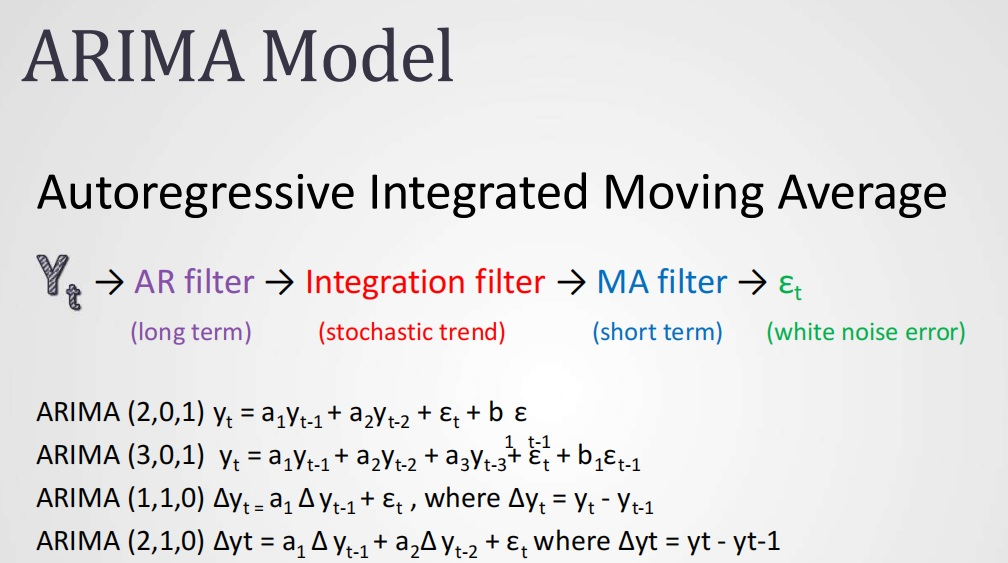

In [37]:
# Auto ARIMA
display(Image(filename='ARIMA Model.jpg'))

In [38]:
#!pip install pmdarima

In [39]:
from pmdarima import auto_arima

train = new_data[:987]
test = new_data[987:]

train_arima = train['Close']
test_arima = test['Close']

In [40]:
model = auto_arima(train_arima, start_p = 1, start_q = 1, max_p=3, max_q=3, m = 12, start_P=0, seasonal=True, d=1, 
                   D=1, trace=True,error_action='ignore',
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.84 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.37 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=0.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=1.57 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

In [41]:
model.fit(train_arima)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [42]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast, index=test.index, columns=["Predictions"])

display(forecast.head(10))

,Predictions
Date,
2017-10-09,212.067645
2017-10-10,211.893666
2017-10-11,213.446286
2017-10-12,212.614437
2017-10-13,213.373741
2017-10-16,214.663363
2017-10-17,216.335234
2017-10-18,214.974476
2017-10-19,216.046990


In [43]:
rms = np.sqrt(np.mean(np.power(np.array(test['Close'] - forecast["Predictions"]), 2)))
rms

54.54322327215009

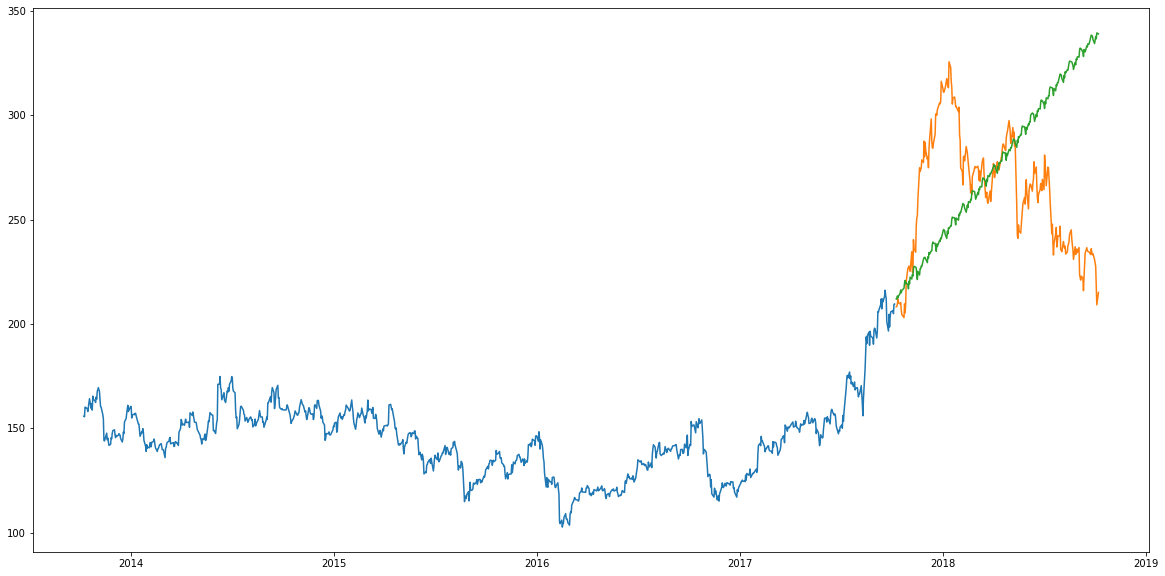

In [44]:
plt.plot(train["Close"])
plt.plot(test['Close'])
plt.plot(forecast['Predictions'])
plt.show()

In [45]:
#!pip uninstall tensorflow

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_LSTM = new_data[['Close']].copy()

train = data_LSTM[:987]
valid = data_LSTM[987:]

data_LSTM_scaled = scaler.fit_transform(data_LSTM.values)
data_LSTM_scaled

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [48]:
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(data_LSTM_scaled[i - 60 : i, 0])
    y_train.append(data_LSTM_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [49]:
x_train.shape

(927, 60)

In [50]:
x_train = x_train[:, :, None]
x_train.shape

(927, 60, 1)

In [51]:
# create and fit LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

927/927 [==============================] - 23s 20ms/step - loss: 0.0011


In [58]:
inputs = data_LSTM_scaled[len(data_LSTM_scaled) - len(valid) - 60:]

x_test = []
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape


(248, 60, 1)

In [60]:
y_predict = model.predict(x_test)
y_predict = scaler.inverse_transform(y_predict)
y_predict[:10]

array([[209.60938],
       [210.83812],
       [211.74492],
       [212.5015 ],
       [213.48781],
       [214.13182],
       [214.39948],
       [214.54257],
       [214.00041],
       [212.83307]], dtype=float32)

In [61]:
rms = np.sqrt(np.mean(np.power(valid - y_predict, 2)))
rms

Close    11.994911
dtype: float64

In [62]:
DateIndex = valid.index
valid = valid.reset_index(drop = True)
valid['Predictions'] = y_predict
valid.index = DateIndex

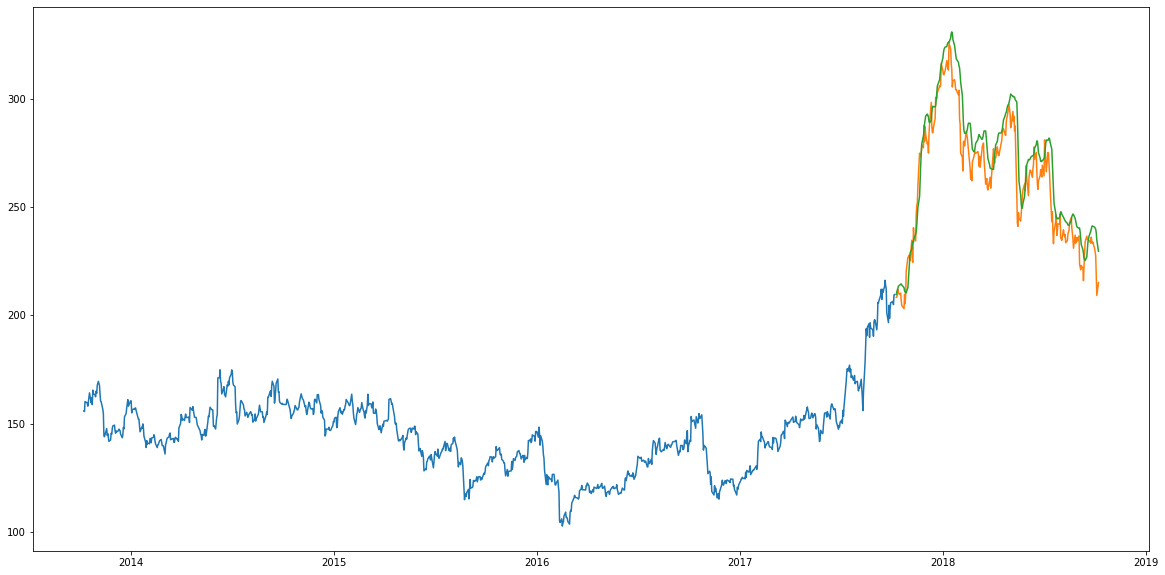

In [63]:
#for plotting
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])